# **Lecture: Linear Regression using Gradient Descent**

Data Source: https://www.kaggle.com/unsdsn/world-happiness

## **Tools we will need**

In [1]:
import numpy as np # Numpy
import pandas as pd # Pandas is a great tool for working with and displaying data.
import matplotlib.pyplot as plt # For plotting.
import seaborn as sns # For statistics tools.
from mpl_toolkits import mplot3d # Load the 3d plotting tools.

---
## **Data Loading**

In [2]:
RAW_DATA_FRAME = pd.read_csv("~/Files/Data/Happiness_data/2019.csv", header = None)
RAW_DATA_FRAME = RAW_DATA_FRAME.iloc[1:] # Remove the 0 row.

Colnames = ['Rank', 'Country', 'Happy', 'GDPpc', 'Soc_Sup', 'Life_Expect', 'Freedom', 'Generosity', 'Corruption']
RAW_DATA_FRAME.columns = Colnames 
RAW_DATA_FRAME.head()

,Rank,Country,Happy,GDPpc,Soc_Sup,Life_Expect,Freedom,Generosity,Corruption
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# This will remove the country tag. Since they are sorted to begin with, we can use the Rank to find the country if need be.
RAW_DATA_FRAME = RAW_DATA_FRAME.loc[:,('Rank', 'Happy', 'GDPpc', 'Soc_Sup', 'Life_Expect', 'Freedom', 'Generosity', 'Corruption')]

# Make all the entries in the dataframe into floats. (They were read in as strings.)
cols = RAW_DATA_FRAME.columns
for col in cols:
    RAW_DATA_FRAME[col] = RAW_DATA_FRAME[col].astype(float)

RAW_DATA_FRAME.iloc[10:20]

,Rank,Happy,GDPpc,Soc_Sup,Life_Expect,Freedom,Generosity,Corruption
11,11.0,7.228,1.372,1.548,1.036,0.557,0.332,0.290
12,12.0,7.167,1.034,1.441,0.963,0.558,0.144,0.093
13,13.0,7.139,1.276,1.455,1.029,0.371,0.261,0.082
14,14.0,7.090,1.609,1.479,1.012,0.526,0.194,0.316
15,15.0,7.054,1.333,1.538,0.996,0.450,0.348,0.278
16,16.0,7.021,1.499,1.553,0.999,0.516,0.298,0.310
17,17.0,6.985,1.373,1.454,0.987,0.495,0.261,0.265
18,18.0,6.923,1.356,1.504,0.986,0.473,0.160,0.210
19,19.0,6.892,1.433,1.457,0.874,0.454,0.280,0.128
20,20.0,6.852,1.269,1.487,0.920,0.457,0.046,0.036


### **Looking for a linear correlation** 

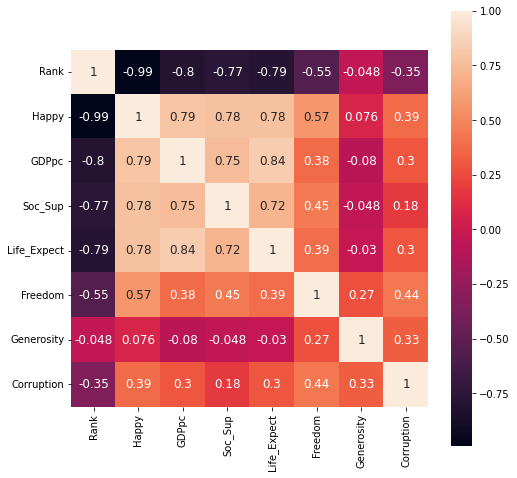

In [4]:
fig = plt.subplots(figsize = (8,8))
sns.heatmap(RAW_DATA_FRAME.corr(), square = True, annot=True, annot_kws={'size': 12})
#sns.pairplot(RAW_DATA_FRAME)
plt.show()

This next section of code allows us to plot different features with respect to each other. For this method of machine learning we are looking for a linear correlation.

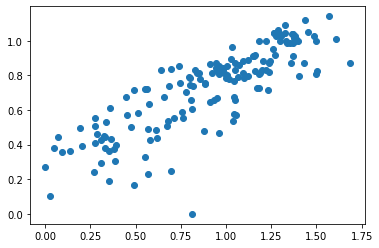

In [6]:
plt.scatter(RAW_DATA_FRAME["GDPpc"],RAW_DATA_FRAME["Life_Expect"])
plt.show()

In [7]:
# Assign the strings the following names.
X_FEATURE = "Soc_Sup"
Y_TARGET = "Happy"

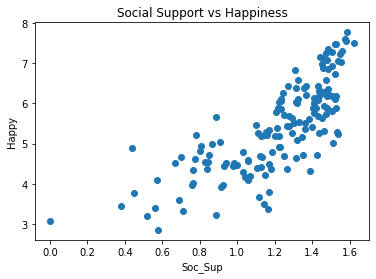

In [8]:
# Plot the scatter plot for the given feature and target.
plt.scatter(RAW_DATA_FRAME[X_FEATURE],RAW_DATA_FRAME[Y_TARGET])

plt.title("Social Support vs Happiness")
plt.xlabel(X_FEATURE)
plt.ylabel(Y_TARGET)

plt.show()

---
## **Linear Regression with Gradient Descent**

**The Goal: Find a line that best fits the data.**

First recall that the equation of a line is:
$$ L(x) = mx + b $$
Where, $m$ and $b$ are the slope and the y-intercept respectively.  
So, finding this line of best fit is going to boil down to finding the best $m$ and $b$ values.

The cost function that we want to minimize is:
$$J(m,b) = \frac{1}{N} \sum^{N}_{i=1} (mx_i + b - y_i)^2  $$  
This is the **Mean Squared Error** (MSE). Key: $N$ Total Datum, $mx_i + b$ is the prediction, and $y_i$ is the known value.

**The Gradient**  
Like the derivative, the gradient represents the slope of the tangent of the graph of the function. More precisely, the gradient points in the direction of the greatest rate of increase of the function, and its magnitude is the slope of the graph in that direction. The components of the gradient in coordinates are the coefficients of the variables in the equation of the tangent space to the graph. This characterizing property of the gradient allows it to be defined independently of a choice of coordinate system, as a vector field whose components in a coordinate system will transform when going from one coordinate system to another. https://en.wikipedia.org/wiki/Gradient

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Storm_King_Mountain_%28Colorado%29.JPG/1920px-Storm_King_Mountain_%28Colorado%29.JPG' width=600 alt='[img: Mountain]'/>

*(Image source: [WIKI](https://en.wikipedia.org/wiki/Storm_King_Mountain_(Colorado)#/media/File:Storm_King_Mountain_(Colorado).JPG))*  

### **Compute the Gradient:**  
The following is the notation that we will need to write down this important function. Since everything that we will be working with from here on out will be vectors of multiple features, we are going to be using gradient as the derivative we will be considering.
$$\nabla J(m,b) = \left \langle \frac{\partial J}{\partial m},\frac{\partial J}{\partial b} \right \rangle $$

So, let's compute this object:  
$$\nabla J(m,b) = \left \langle \frac{\partial}{\partial m} \left( \frac{1}{N} \sum^{N}_{i=1} (mx_i + b - y_i)^2 \right), \frac{\partial}{\partial b} \left( \frac{1}{N} \sum^{N}_{i=1} (mx_i + b - y_i)^2 \right) \right \rangle $$

$$= \left \langle \frac{2}{N} \sum^{N}_{i=1} (mx_i + b - y_i)x_i , \frac{2}{N} \sum^{N}_{i=1} (mx_i + b - y_i)  \right \rangle $$

Now, recall that the gradient points in the direction of greatest increase, so negative the gradient would point in the direction of fastest decent. The first entry tells us what direction we need to travel to minimize the error for $m$ and the second entry does the same but for $b$.  

Let's make a list of each of the pieces:  
1. $N$ is the number of datum we have **total**.
2. Each $x_i$ is one **feature** data value. (Total Protiens)
3. Each $y_i$ is the corresponding **target value**. (Albumin)
4. $m$ and $b$ are the **slope** and **y-intercept**.
5. $mx_i + b$ is the **line**. (For the working $m$ and $b$)
6. $mx_i + b - y_i$ is the **error** between the line and the real data value.  
---

## **The Error Surface**

This next section of code is going to allow us to look at the surface that we are going to need to navigate. Our goal will be to find the lowest point on this surface. This will represent the minimum error for the m and b values and will give us the weights for the line of best fit.

In [9]:
x = RAW_DATA_FRAME[X_FEATURE] 
Y = RAW_DATA_FRAME[Y_TARGET]

In [10]:
# This section finds the z values for the surface. 
def surface():

    Z = [] # list to collect the z values.
    x = np.array(RAW_DATA_FRAME[X_FEATURE]) # x data.
    Y = np.array(RAW_DATA_FRAME[Y_TARGET]) # Y data.
    N = len(Y) # Total number of data values.

    # Set linear spaces for the b and m variables
    line = np.linspace(-8, 8, 50)
    #bline = np.linspace(-8, 8, 50)
 
    # Loops to sample over all the m and b values in the line spaces and over the data.
    for m in line:
        for b in line:
            S = 0
            for i in range(len(Y)):
                # This is the sum of the square errors.
                S = S + (m * x[i] + b - Y[i]) ** 2
                Z.append([m,b,S]) # Append to the Z list.

    
    return Z

In [11]:
# Make into a numpy array.
Z = np.array(surface())
print(np.shape(Z))

(390000, 3)


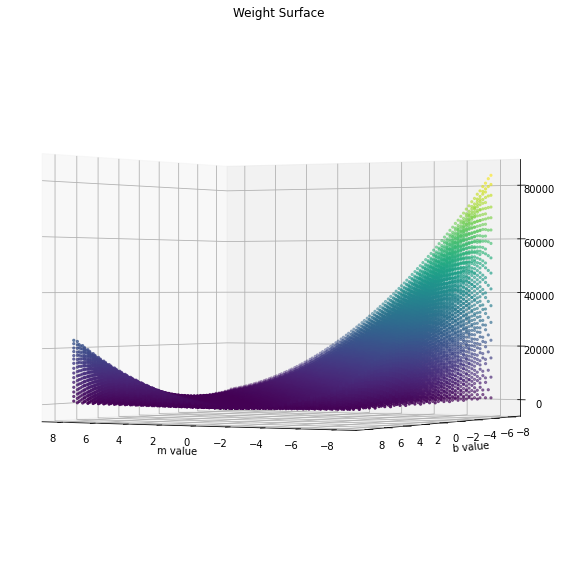

In [12]:
# This plots the surface in 3D.
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

X = Z[:,0][::10]
Y = Z[:,1][::10]
z = Z[:,2][::10]

plt.title('Weight Surface')
plt.xlabel("m value")
plt.ylabel("b value")
ax.scatter3D(X, Y ,z , c= z, marker='.')
ax.view_init(elev = 0, azim=120)
plt.show()


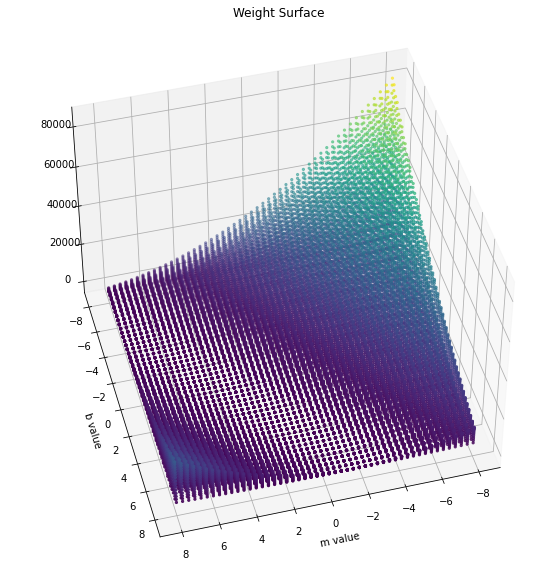

In [13]:
# This plots the surface in 3D.
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

plt.title('Weight Surface')
plt.xlabel("m value")
plt.ylabel("b value")

X = Z[:,0][::10]
Y = Z[:,1][::10]
z = Z[:,2][::10]

ax.scatter3D(X, Y ,z , c = z, marker='.')
ax.view_init(elev = 45, azim=75)
plt.show()

---
## **The Code**  
The next set of code blocks will be the build and training of the above process. The breakdown of the process follows the next code block.

In [14]:
def gradientDescentLinearRegression(x, Y, learning_Rate, epochs):
        
    # This is the N from above.
    N = len(Y)
    
     # Random weights for our slope and intercept.
    weights = np.random.rand(2)
    
    y_intercept = [weights[0]] # List to collect the y intercepts.
    slope = [weights[1]] # List to collect the slopes.
    
    ## BREAKDOWN OF EACH LINE BELOW.##
    for i in range(epochs):
        
        pred =  weights[1] * x + weights[0]

        error = pred - Y
        
        b = weights[0] - learning_Rate * (2 / N) * (error.sum())
        m = weights[1] - learning_Rate * (2 / N) * ((x * error).sum())
        
        weights = np.array([b,m])
        
        y_intercept.append(b)
        slope.append(m)
    
    ###################################
    
    # Return the weights, the list of intercepts and the list of slopes.
    return [weights,y_intercept,slope]

---
**Let's break this down:**

This loop will loop over all the data as many times as we set in the epochs argument.
```
for i in range(epochs):
        
```
This next line will predict what y value will will get for each of the features that we have.
```
        pred = x * weights[1] + weights[0]
```
This next line will subtract, data for data, each prediction value from each correct target value, Y.
```
        error = pred - Y

```
This next step is the main event. We are going to subtract the gradient from each of the weights (y-int and slope) to get an updated weight value. Note that this is the same as the gradient that we computed above except for the learning rate. We should think of the learning rate as how far to step. A larger learning rate will give us a big step "down the hill" and a smaller step will correspond to a smaller learning rate. 
```
        b = weights[0] - learning_Rate * (2 / N)  * (error.sum())
        m = weights[1] - learning_Rate * (2 / N) * ((x * error).sum())
```         
The last part here will save the updated weights and continue to append to a growing list for the y intercepts and slopes as it learns. 
```
        weights = np.array([b,m])     
        y_intercept.append(b)
        slope.append(m)
```
---

This next cell will run the above process for epoch = 10000 times.

In [31]:
w, y_int, slp = gradientDescentLinearRegression(RAW_DATA_FRAME[X_FEATURE], RAW_DATA_FRAME[Y_TARGET], .017, 10000) # Call the definition with our data sets.
print(w) # This is the vector containing the weights. We can think about this as the brain of the "network".
print(y_int[0:10]) # y int for the first 10 epochs.
print(slp[0:10]) # slopes for the first 10 epochs.

[1.91243113 2.89098634]
[0.42913537659072165, 0.5685072046446822, 0.6959471817222468, 0.8124755398375217, 0.9190252776727413, 1.01644961932511, 1.1055288353054002, 1.1869764803179512, 1.2614450976892442, 1.3295314360484178]
[0.7269847051251216, 0.9020033162752417, 1.0620692784369319, 1.2084610795217265, 1.3423478923901786, 1.4647989216608042, 1.5767919513350463, 1.6792211615712078, 1.7729042770976051, 1.8585891044120646]


---
## **Visualize the Process of training**

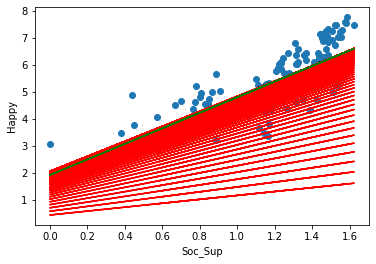

In [35]:
x = np.arange(0,5,.01) # Setup a range for plotting.

x = RAW_DATA_FRAME[X_FEATURE] # Data for the feature that we are considering.

plt.scatter(x,RAW_DATA_FRAME[Y_TARGET]) # Plot the data.

# Plot some of the lines (remember there are 10000 of them)
for i in range(10000):
    #if i%100 == 0:
    plt.plot(x, slp[i] * x + y_int[i], c = "r")

plt.plot(x, w[1] * x + w[0], c = "g")

plt.xlabel(X_FEATURE)
plt.ylabel(Y_TARGET)

plt.show()

Now just with the line we found.

---
## **Deploy our model**

In [ ]:
x = np.arange(0,5,.01)

x = RAW_DATA_FRAME[X_FEATURE]

plt.scatter(x,RAW_DATA_FRAME[Y_TARGET])
plt.plot(x, w[1] * x + w[0], c = "g")

plt.xlabel(X_FEATURE)
plt.ylabel(Y_TARGET)

plt.show()

In [ ]:
w

Now we can use the above weights to make predictions.

In [ ]:
def Happy(x):
    return w[0] + x * w[1]

In [ ]:
Happy(1.4)